<a href="https://colab.research.google.com/github/Joseikwang/Data_Sci_Analysis-50400/blob/main/CEMA_TASK_Q_1_AND_TWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1**

# **HIV AND POVERTY ANALYSIS**

# **Step 1: Import Libraries and Load Data**

In [ ]:
# INSTALL & IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot styles
sns.set(style='whitegrid', palette='Set2')


In [ ]:
#  LOAD DATA

# Load HIV dataset (fix encoding issue)
hiv_data = pd.read_csv('/content/HIV data 2000-2023.csv', encoding='latin1')

# Load Multidimensional Poverty data (skip header rows)
poverty_data = pd.read_excel('/content/multidimensional_poverty.xlsx', sheet_name='data', header=2)


In [ ]:
print(hiv_data.head())

    IndicatorCode                                          Indicator  \
0  HIV_0000000001  Estimated number of people (all ages) living w...   
1  HIV_0000000001  Estimated number of people (all ages) living w...   
2  HIV_0000000001  Estimated number of people (all ages) living w...   
3  HIV_0000000001  Estimated number of people (all ages) living w...   
4  HIV_0000000001  Estimated number of people (all ages) living w...   

  ValueType ParentLocationCode ParentLocation Location type  \
0   numeric                AFR         Africa       Country   
1   numeric                AFR         Africa       Country   
2   numeric                AFR         Africa       Country   
3   numeric                AFR         Africa       Country   
4   numeric                AFR         Africa       Country   

  SpatialDimValueCode Location Period type  Period  \
0                 AGO   Angola        Year    2023   
1                 AGO   Angola        Year    2022   
2                 AGO   An

In [ ]:
print(poverty_data.head())

  Unnamed: 0 Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4  Unnamed: 5  \
0        SSA        AGO     Angola        2018      IDREA        2018   
1        ECA        ALB    Albania        2012        HBS        2018   
2        LAC        ARG  Argentina        2010    EPHC-S2        2021   
3        ECA        ARM    Armenia        2010       ILCS        2021   
4        EAP        AUS  Australia        2010    SIH-LIS        2018   

  Unnamed: 6 Unnamed: 7  Unnamed: 8  Monetary (%) Educational attainment (%)  \
0          N          c           2     31.122005                  29.753423   
1          N          c           1      0.048107                    0.19238   
2          U          i           3      0.894218                    1.08532   
3          N          c           1      0.523521                          0   
4          N          I           3      0.516880                    1.71188   

  Educational enrollment (%) Electricity (%) Sanitation (%)  \
0                

# **Explanation:**

- We import essential libraries: pandas for data manipulation, matplotlib.pyplot and seaborn for visualization.

- The HIV dataset is read using latin1 encoding to handle special characters that might cause decoding errors.

- The poverty dataset is an Excel file, so we use pd.read_excel to load it.​

# **Step 2: Clean and Prepare the HIV Data**
Select relevant columns, rename them for clarity, and ensure correct data types.

In [ ]:
# CLEAN HIV DATA

# Extract numeric estimate from 'Value' column
def extract_main_value(value):
    if isinstance(value, str):
        value = value.split('[')[0]
        value = value.replace(',', '').replace(' ', '')
        try:
            return int(value)
        except ValueError:
            return np.nan
    return value

hiv_data['HIV_Estimate'] = hiv_data['Value'].apply(extract_main_value)

# Keep only useful columns
hiv_clean = hiv_data[['SpatialDimValueCode', 'Location', 'ParentLocationCode', 'ParentLocation', 'Period', 'HIV_Estimate']]


# **Step 3: Identify Top 75% Countries**

In [ ]:
# FIND COUNTRIES CONTRIBUTING TO 75% OF HIV BURDEN (most recent year)

latest_year = hiv_clean['Period'].max()
latest_data = hiv_clean[hiv_clean['Period'] == latest_year]

# Aggregate by country
top_countries = latest_data.groupby('Location', as_index=False)['HIV_Estimate'].sum()
top_countries = top_countries.sort_values(by='HIV_Estimate', ascending=False)

# Calculate cumulative percentage
top_countries['CumulativePct'] = 100 * top_countries['HIV_Estimate'].cumsum() / top_countries['HIV_Estimate'].sum()

# Filter countries contributing to 75%
top_75_countries = top_countries[top_countries['CumulativePct'] <= 75]['Location'].tolist()


# **Step 4: Visualization — Trends for Top Countries**

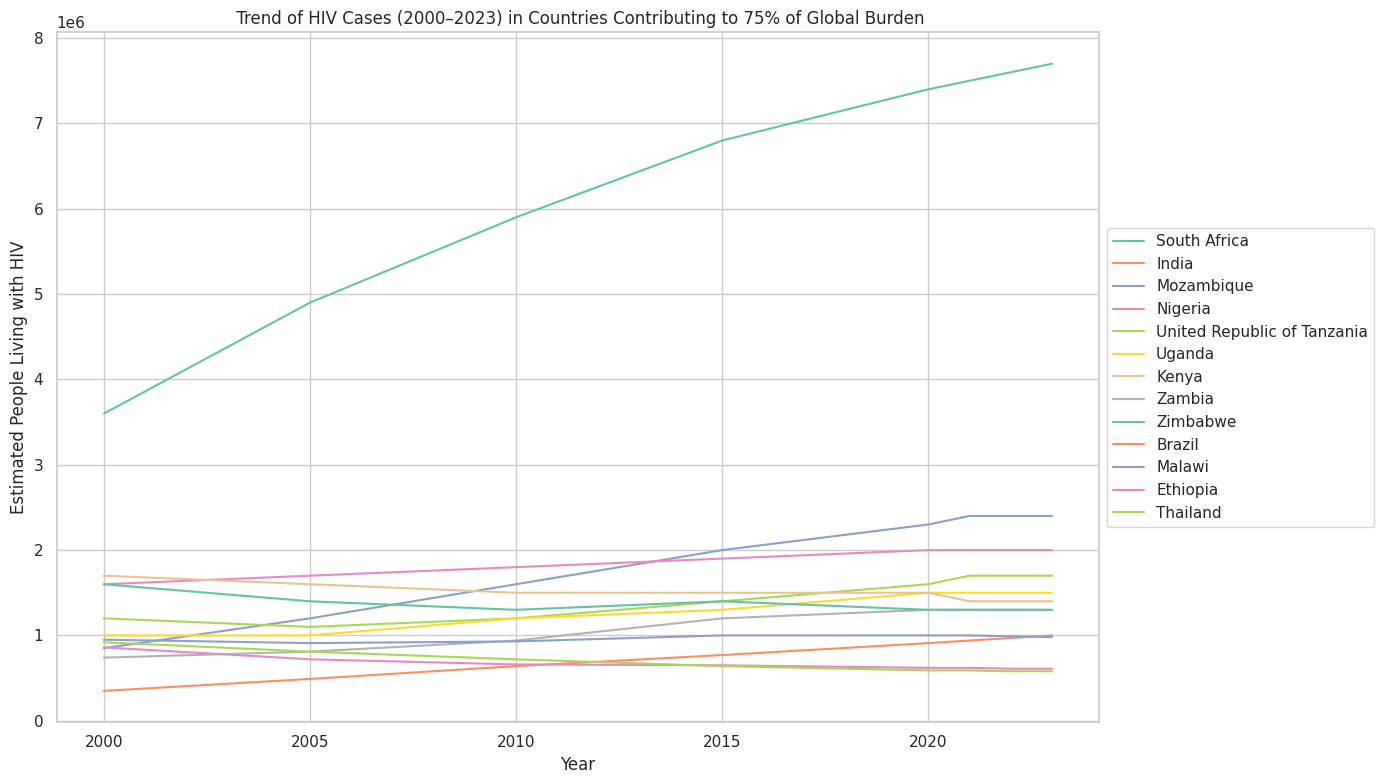

In [ ]:
# VISUALIZE GLOBAL HIV TRENDS FOR TOP 75% COUNTRIES

plt.figure(figsize=(14, 8))
for country in top_75_countries:
    country_data = hiv_clean[hiv_clean['Location'] == country]
    plt.plot(country_data['Period'], country_data['HIV_Estimate'], label=country)

plt.title(' Trend of HIV Cases (2000–2023) in Countries Contributing to 75% of Global Burden')
plt.xlabel('Year')
plt.ylabel('Estimated People Living with HIV')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


## **Step 5: Identify Top 75% Within Each WHO Region**

In [ ]:
# Find Top 75% Countries Within Each WHO Region

region_top_countries = {}

for region in hiv_data['ParentLocationCode'].unique():
    region_df = hiv_data[hiv_data['ParentLocationCode'] == region]
    # Group by 'Location' instead of 'Country' to calculate total HIV cases
    total_hiv_region = region_df.groupby('Location')['HIV_Estimate'].sum().sort_values(ascending=False)
    cumulative_sum_region = total_hiv_region.cumsum()
    cumulative_percent_region = cumulative_sum_region / total_hiv_region.sum()
    region_top_countries[region] = cumulative_percent_region[cumulative_percent_region <= 0.75].index.tolist()

print(region_top_countries)

{'AFR': ['South Africa', 'Mozambique', 'Nigeria', 'Kenya', 'United Republic of Tanzania', 'Zimbabwe', 'Uganda', 'Zambia'], 'AMR': ['Brazil', 'Mexico', 'Colombia', 'Haiti', 'Argentina', 'Venezuela (Bolivarian Republic of)'], 'EMR': ['Pakistan', 'Iran (Islamic Republic of)', 'Sudan', 'Egypt'], 'EUR': ['Ukraine', 'France', 'Spain', 'Italy', 'Portugal', 'Germany'], 'SEAR': ['Thailand', 'Indonesia'], 'WPR': ['Viet Nam', 'Philippines', 'Cambodia']}


# **Step 6: Visualization — Trends by WHO Region**

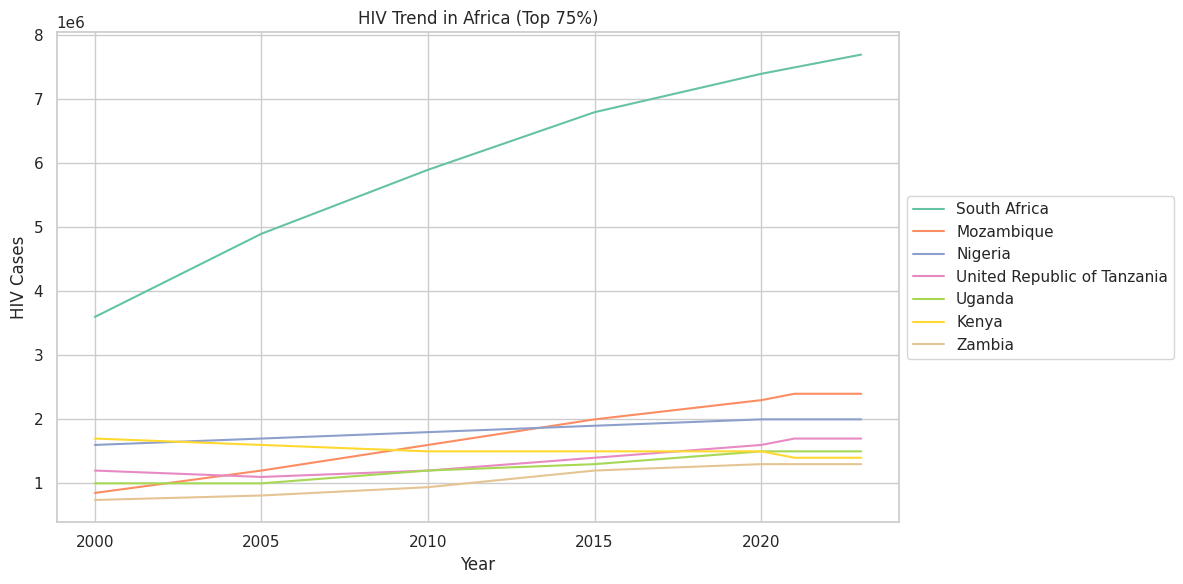

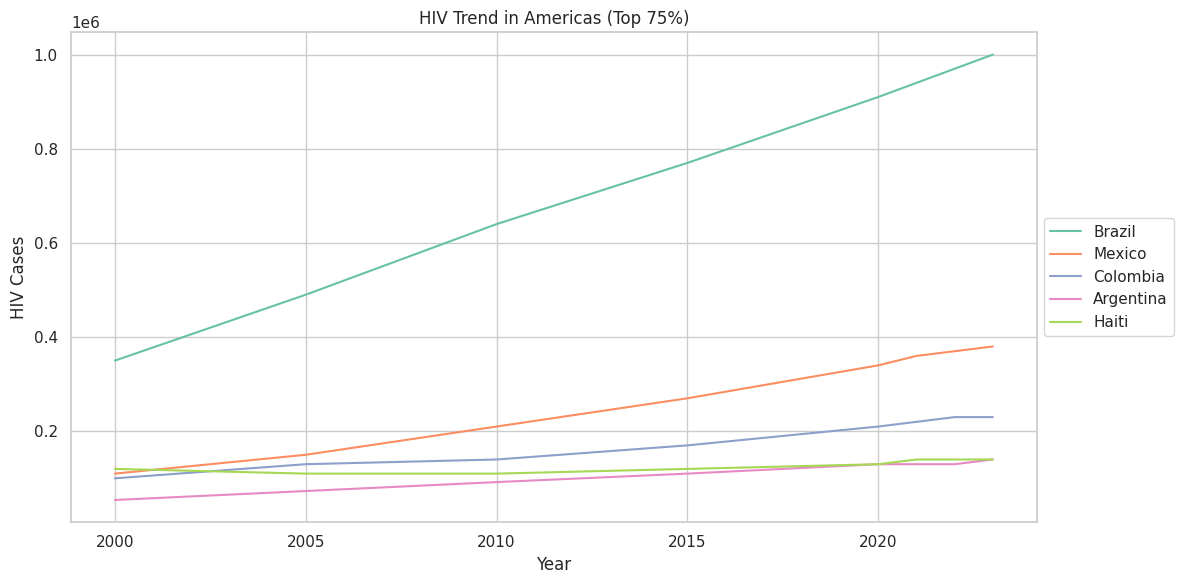

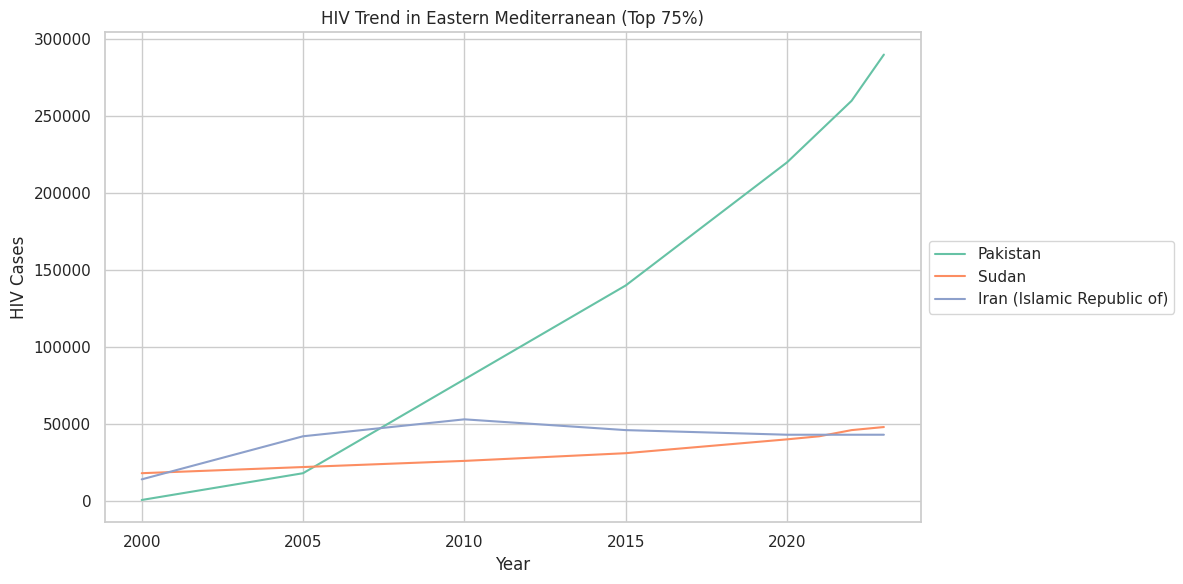

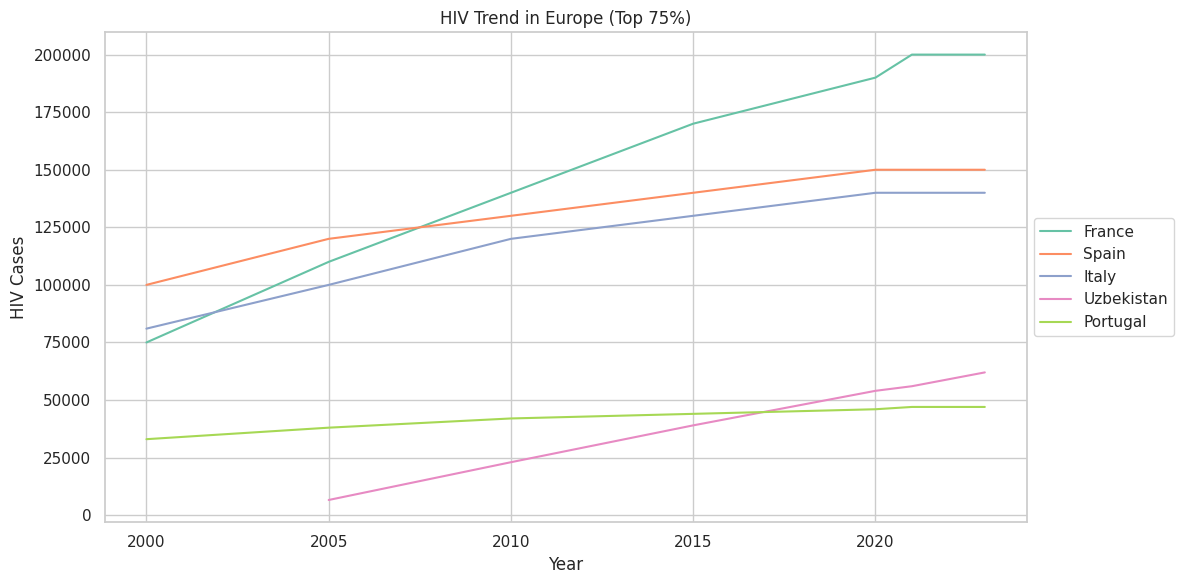

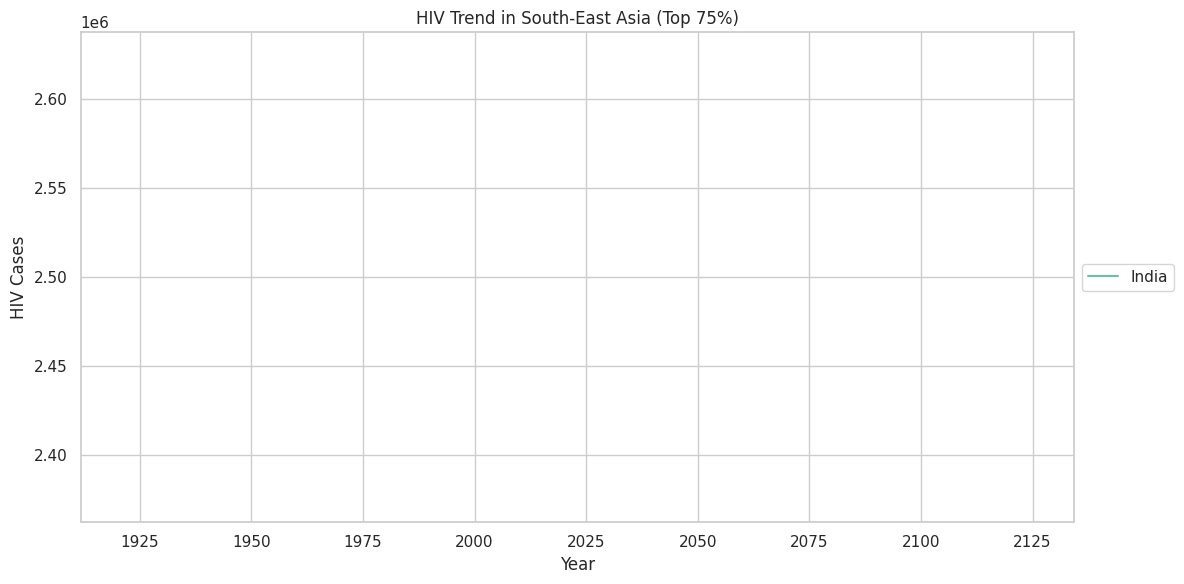

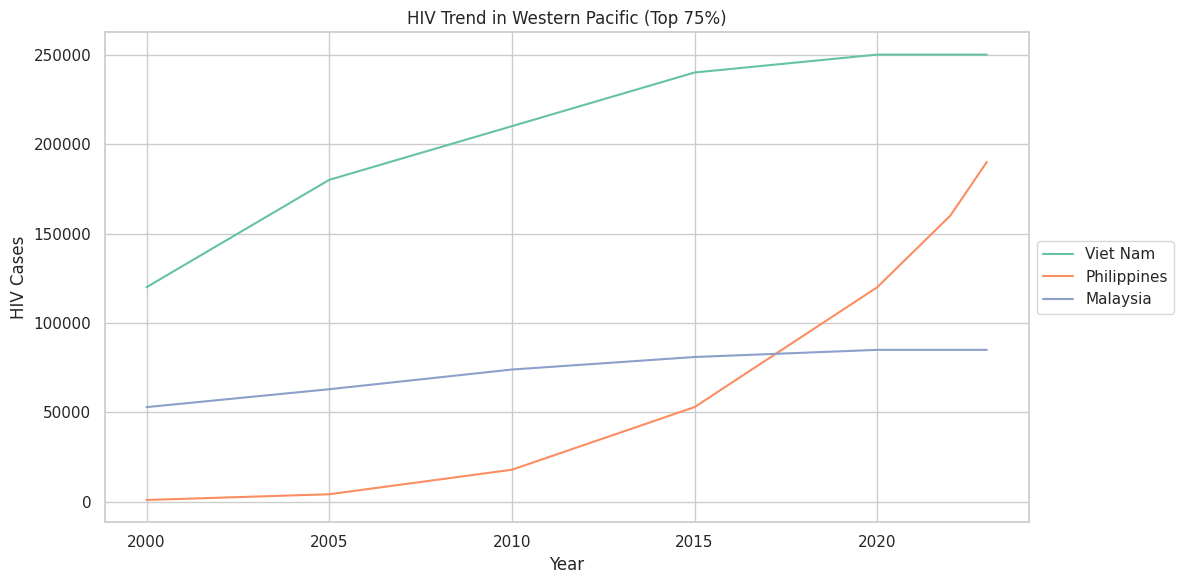

In [ ]:
# VISUALIZE TRENDS BY WHO REGION (TOP 75% WITHIN EACH REGION)

region_trends = []

# Loop over regions
for region in hiv_clean['ParentLocationCode'].unique():
    regional_data = hiv_clean[hiv_clean['ParentLocationCode'] == region]
    year_latest = regional_data['Period'].max()

    # Aggregate and find top countries within region
    latest_region = regional_data[regional_data['Period'] == year_latest]
    region_grouped = latest_region.groupby('Location', as_index=False)['HIV_Estimate'].sum()
    region_grouped = region_grouped.sort_values(by='HIV_Estimate', ascending=False)
    region_grouped['CumulativePct'] = 100 * region_grouped['HIV_Estimate'].cumsum() / region_grouped['HIV_Estimate'].sum()
    top_in_region = region_grouped[region_grouped['CumulativePct'] <= 75]['Location'].tolist()

    # Plot for each region
    plt.figure(figsize=(12, 6))
    for country in top_in_region:
        subset = regional_data[regional_data['Location'] == country]
        plt.plot(subset['Period'], subset['HIV_Estimate'], label=country)

    plt.title(f'HIV Trend in {regional_data["ParentLocation"].iloc[0]} (Top 75%)')
    plt.xlabel('Year')
    plt.ylabel('HIV Cases')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()


# **Step 7: Merge Poverty Dataset**

In [ ]:
print(hiv_data.columns)
print(poverty_data.columns)


Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value', 'HIV_Estimate'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Monetary (%)',
       'Educational attainment (%)', 'Educational enrollment (%)',
       'Electricity (%)', 'Sanitation (%)', 'Drinking water (%)',
       'Unnamed: 15'],
      dtype='object')


In [ ]:
# HIV data columns we'll use:
# 'Location' - country name
# 'SpatialDimValueCode' - country code (3-letter ISO)
# 'Period' - year
# 'HIV_Estimate' - our target variable

# Poverty data columns we need to identify:
# Country name column
# Country code column
# Year column
# Poverty indicators

# Let's rename columns for clarity based on our file structure
poverty_data = poverty_data.rename(columns={
    'Unnamed: 2': 'Country',  # Assuming column 2 is country names
    'Unnamed: 1': 'CountryCode',  # Assuming column 1 is country codes
    'Unnamed: 3': 'Year',  # Assuming column 3 is year
    'Monetary (%)': 'MonetaryPoverty',
    'Educational attainment (%)': 'EducationAttainment',
    'Educational enrollment (%)': 'EducationEnrollment',
    'Electricity (%)': 'Electricity',
    'Sanitation (%)': 'Sanitation',
    'Drinking water (%)': 'DrinkingWater'
})

# Clean year column in poverty data (remove non-numeric if needed)
poverty_data['Year'] = poverty_data['Year'].astype(str).str.extract('(\d+)')[0].astype(float)

# Prepare HIV data
hiv_data['Year'] = pd.to_datetime(hiv_data['Period'], format='%Y').dt.year

In [ ]:
# Option 1: Merge on country code (more reliable)
merged_data = pd.merge(
    hiv_data,
    poverty_data,
    left_on=['SpatialDimValueCode', 'Year'],
    right_on=['CountryCode', 'Year'],
    how='inner'
)

# Option 2: Or merge on country name (might need name standardization)
# merged_data = pd.merge(
#     hiv_data,
#     poverty_data,
#     left_on=['Location', 'Year'],
#     right_on=['Country', 'Year'],
#     how='inner'
# )

print(f"Merged {len(merged_data)} records")
print("Merged columns:", merged_data.columns.tolist())

Merged 48 records
Merged columns: ['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location', 'Period type', 'Period', 'Value', 'HIV_Estimate', 'Year', 'Unnamed: 0', 'CountryCode', 'Country', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'MonetaryPoverty', 'EducationAttainment', 'EducationEnrollment', 'Electricity', 'Sanitation', 'DrinkingWater', 'Unnamed: 15']


In [ ]:
# Check for country code mismatches
print("HIV country codes:", hiv_data['SpatialDimValueCode'].unique())
print("Poverty country codes:", poverty_data['CountryCode'].unique())

# Create a mapping if codes differ
code_mapping = {
    'COD': 'ZAR',  # Example: Congo DR
    'TZA': 'EAT',  # Tanzania
    # Add other mappings as needed
}

hiv_data['SpatialDimValueCode'] = hiv_data['SpatialDimValueCode'].replace(code_mapping)

HIV country codes: ['AGO' 'BDI' 'BEN' 'BFA' 'BWA' 'CAF' 'CIV' 'CMR' 'COD' 'COG' 'COM' 'CPV'
 'DZA' 'ERI' 'ETH' 'GAB' 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'KEN' 'LBR' 'LSO'
 'MDG' 'MLI' 'MOZ' 'MRT' 'MUS' 'MWI' 'NAM' 'NER' 'NGA' 'RWA' 'SEN' 'SLE'
 'SSD' 'STP' 'SWZ' 'SYC' 'TCD' 'TGO' 'TZA' 'UGA' 'ZAF' 'ZMB' 'ZWE' 'ARG'
 'ATG' 'BHS' 'BLZ' 'BOL' 'BRA' 'BRB' 'CAN' 'CHL' 'COL' 'CRI' 'CUB' 'DMA'
 'DOM' 'ECU' 'GRD' 'GTM' 'GUY' 'HND' 'HTI' 'JAM' 'KNA' 'LCA' 'MEX' 'NIC'
 'PAN' 'PER' 'PRY' 'SLV' 'SUR' 'TTO' 'URY' 'USA' 'VCT' 'VEN' 'AFG' 'ARE'
 'BHR' 'DJI' 'EGY' 'IRN' 'IRQ' 'JOR' 'KWT' 'LBN' 'LBY' 'MAR' 'OMN' 'PAK'
 'QAT' 'SAU' 'SDN' 'SOM' 'SYR' 'TUN' 'YEM' 'ALB' 'AND' 'ARM' 'AUT' 'AZE'
 'BEL' 'BGR' 'BIH' 'BLR' 'CHE' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN'
 'FRA' 'GBR' 'GEO' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ISR' 'ITA' 'KAZ' 'KGZ'
 'LTU' 'LUX' 'LVA' 'MCO' 'MDA' 'MKD' 'MLT' 'MNE' 'NLD' 'NOR' 'POL' 'PRT'
 'ROU' 'RUS' 'SMR' 'SRB' 'SVK' 'SVN' 'SWE' 'TJK' 'TKM' 'TUR' 'UKR' 'UZB'
 'BGD' 'BTN' 'IDN' 'IND' 'LKA' '

In [ ]:
# Select only needed columns
final_data = merged_data[[
    'Location', 'Year', 'HIV_Estimate',
    'MonetaryPoverty', 'EducationAttainment', 'EducationEnrollment',
    'Electricity', 'Sanitation', 'DrinkingWater'
]].dropna()

print(final_data.head())

        Location  Year  HIV_Estimate  MonetaryPoverty EducationAttainment  \
0          Benin  2015       71000.0        12.723279           49.023893   
1  Cote d'Ivoire  2015      460000.0         9.733193           44.493997   
2  Guinea-Bissau  2010       37000.0        25.962856           20.071073   
3          Kenya  2015     1500000.0        36.146057           10.055726   
4         Malawi  2010      930000.0        70.060599           54.329389   

  EducationEnrollment Electricity Sanitation DrinkingWater  
0           31.661823   34.818304  76.649594      24.10913  
1           24.717054     9.26495  59.909374     17.286547  
2           31.059781    27.57051  60.362864     20.897064  
3            1.179968   24.500306  22.312516     36.060327  
4            3.686354   88.757396  75.137657     11.400399  


# **Step 8: RELATIONSHIP BETWEEN HIV & MULTIDIMENSIONAL POVERTY**

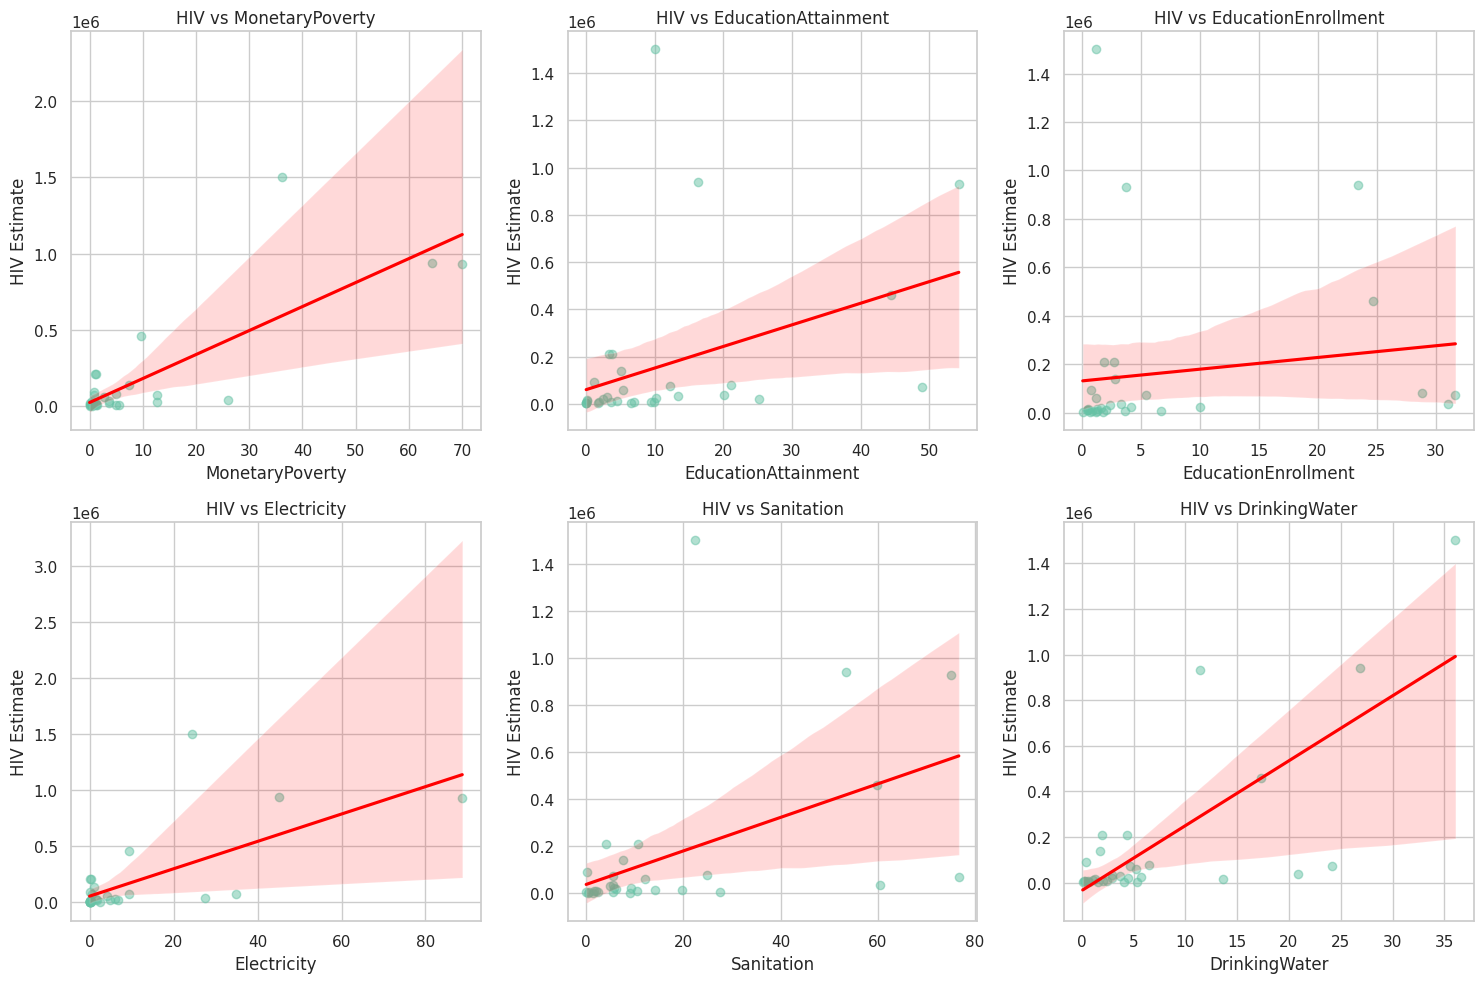

              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     log_HIV 
No. Observations:     31          Method:                 REML    
No. Groups:           31          Scale:                  0.9670  
Min. group size:      1           Log-Likelihood:         -50.4409
Max. group size:      1           Converged:              Yes     
Mean group size:      1.0                                         
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               10.367    0.243 42.614 0.000  9.891 10.844
MonetaryPoverty_std      1.305    0.852  1.531 0.126 -0.366  2.976
EducationAttainment_std  0.946    0.235  4.024 0.000  0.485  1.406
EducationEnrollment_std -0.160    0.465 -0.345 0.730 -1.071  0.750
Electricity_std         -0.848    1.063 -0.798 0.425 -2.932  1.235
Sanitation

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Proper Data Preparation (Fixes both warnings)
# Create a clean copy to avoid SettingWithCopyWarning
analysis_data = merged_data.copy()

# Convert all poverty indicators to numeric
for col in ['MonetaryPoverty', 'EducationAttainment', 'EducationEnrollment',
            'Electricity', 'Sanitation', 'DrinkingWater']:
    analysis_data[col] = pd.to_numeric(analysis_data[col], errors='coerce')

# Convert Year to proper numeric type first, then categorical
analysis_data['Year'] = pd.to_numeric(analysis_data['Year'], errors='coerce')
analysis_data['Year'] = analysis_data['Year'].astype('category')

# Ensure HIV_Estimate is numeric
analysis_data['HIV_Estimate'] = pd.to_numeric(analysis_data['HIV_Estimate'], errors='coerce')

# Drop any remaining NA values
analysis_data = analysis_data.dropna(subset=[
    'HIV_Estimate',
    'MonetaryPoverty',
    'EducationAttainment',
    'EducationEnrollment',
    'Electricity',
    'Sanitation',
    'DrinkingWater',
    'Location',
    'Year'
])

# 2. Fixed Visualization Code
plt.figure(figsize=(15, 10))
poverty_indicators = [
    'MonetaryPoverty',
    'EducationAttainment',
    'EducationEnrollment',
    'Electricity',
    'Sanitation',
    'DrinkingWater'
]

for i, indicator in enumerate(poverty_indicators, 1):
    plt.subplot(2, 3, i)
    # Ensure we're plotting numeric data
    plot_data = analysis_data[[indicator, 'HIV_Estimate']].dropna()
    sns.regplot(
        data=plot_data,
        x=indicator,
        y='HIV_Estimate',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )
    plt.title(f'HIV vs {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('HIV Estimate')

plt.tight_layout()
plt.show()

# 3. Robust Mixed Effects Model
try:
    # Log-transform HIV for better normality
    analysis_data['log_HIV'] = np.log1p(analysis_data['HIV_Estimate'])

    # Standardize predictors
    for col in poverty_indicators:
        analysis_data[f'{col}_std'] = (
            analysis_data[col] - analysis_data[col].mean()
        ) / analysis_data[col].std()

    # Model formula with standardized variables
    model_formula = """log_HIV ~ MonetaryPoverty_std + EducationAttainment_std +
                      EducationEnrollment_std + Electricity_std +
                      Sanitation_std + DrinkingWater_std"""

    model = smf.mixedlm(
        model_formula,
        data=analysis_data,
        groups=analysis_data['Location'],
        re_formula='1'
    ).fit()

    print(model.summary())

    # Plot coefficients
    coefficients = pd.DataFrame({
        'Variable': [x.replace('_std', '') for x in model.fe_names[1:]],
        'Coefficient': model.params[1:7],
        'P-value': model.pvalues[1:7]
    })

    plt.figure(figsize=(10, 6))
    sns.pointplot(
        data=coefficients,
        x='Coefficient',
        y='Variable',
        join=False,
        color='blue'
    )
    plt.axvline(x=0, color='red', linestyle='--')
    plt.title('Standardized Coefficients (log HIV)')
    plt.xlabel('Effect Size')
    plt.ylabel('Poverty Indicator')
    plt.show()

except Exception as e:
    print(f"Model failed: {str(e)}")
    print("Debugging info:")
    print("Data types:", analysis_data.dtypes)
    print("NA counts:", analysis_data.isna().sum())

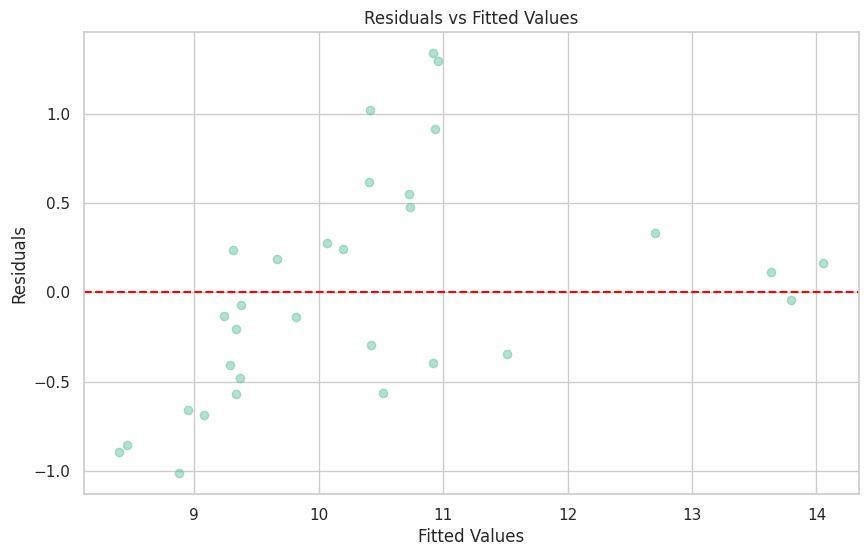

In [ ]:
# 4. Model Diagnostics
# Check residuals
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



Location
Benin                  1
Cote d'Ivoire          1
Guinea-Bissau          1
Kenya                  1
Malawi                 1
Zambia                 1
Argentina              1
Colombia               1
Costa Rica             1
Dominican Republic     1
Ecuador                1
Honduras               1
Mexico                 1
Panama                 1
Peru                   1
Paraguay               1
El Salvador            1
Suriname               1
Uruguay                1
Egypt                  1
Pakistan               1
Tunisia                1
Armenia                1
Georgia                1
Kyrgyzstan             1
Republic of Moldova    1
Romania                1
Serbia                 1
Bangladesh             1
Nepal                  1
Viet Nam               1
Name: count, dtype: int64


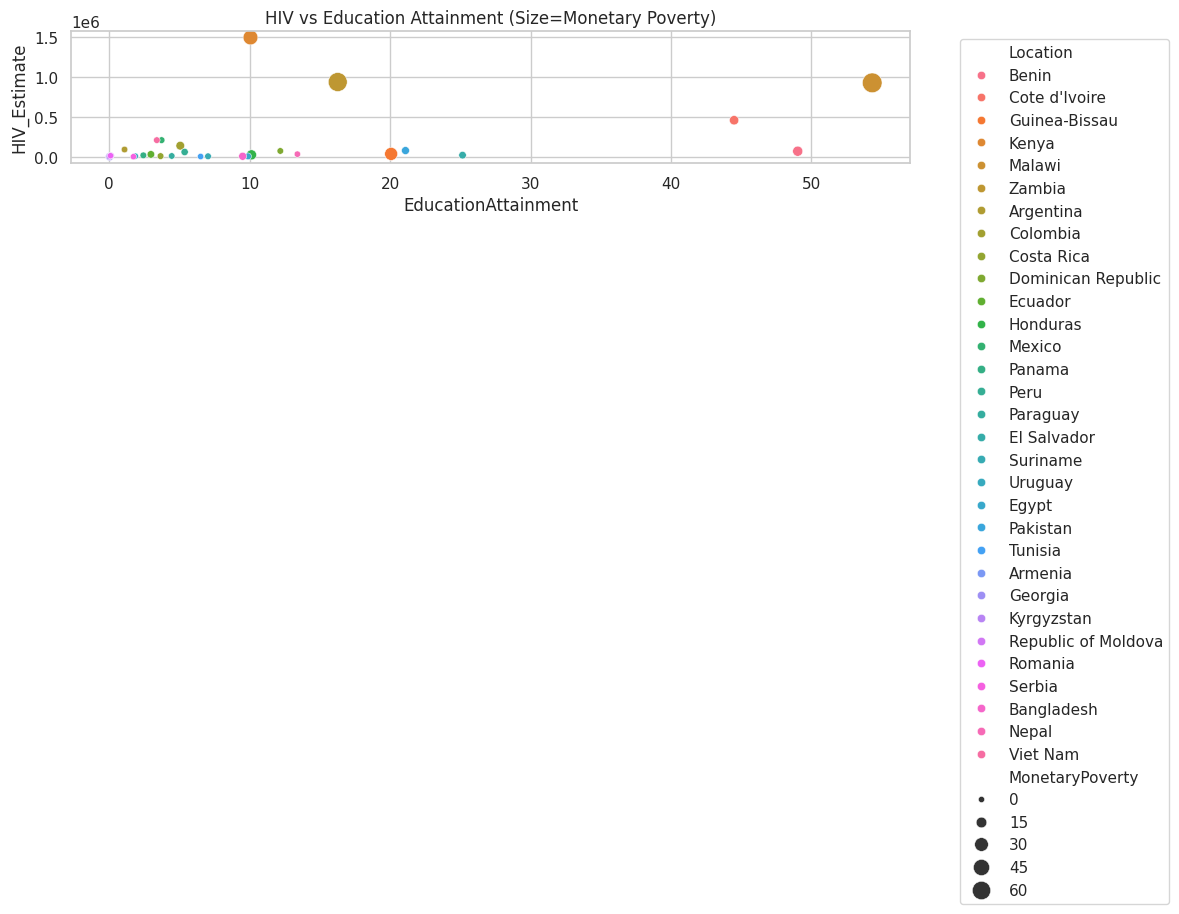


Pooled OLS Results:
                            OLS Regression Results                            
Dep. Variable:                log_HIV   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     6.210
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           0.000486
Time:                        13:04:17   Log-Likelihood:                -50.243
No. Observations:                  31   AIC:                             114.5
Df Residuals:                      24   BIC:                             124.5
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept    

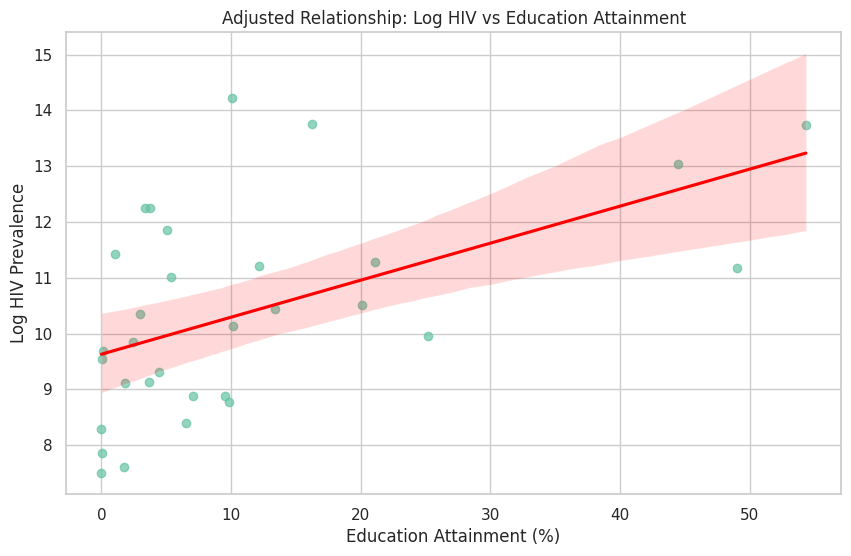

In [ ]:
# Let's try an alternative approach

# 1. First, address the small sample size by:
# - Including multiple years per country
# - Using simpler models if needed

# Create a country-year identifier
analysis_data['country_year'] = analysis_data['Location'] + "_" + analysis_data['Year'].astype(str)

# Check actual observations per country
print(analysis_data['Location'].value_counts())

# 2. Simplified Visualization with Context
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=analysis_data,
    x='EducationAttainment',
    y='HIV_Estimate',
    hue='Location',
    size='MonetaryPoverty',
    sizes=(20, 200)
)
plt.title("HIV vs Education Attainment (Size=Monetary Poverty)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Alternative Modeling Approaches

# Approach A: Pooled OLS with robust SE (if few countries)
model_ols = smf.ols(
    "log_HIV ~ MonetaryPoverty + EducationAttainment + EducationEnrollment + " +
    "Electricity + Sanitation + DrinkingWater",
    data=analysis_data
).fit(cov_type='HC3')  # Robust standard errors

print("\nPooled OLS Results:")
print(model_ols.summary())

# Approach B: Focus on key significant relationships
final_model = smf.ols(
    "log_HIV ~ EducationAttainment + DrinkingWater",
    data=analysis_data
).fit(cov_type='HC3')

print("\nFinal Simplified Model:")
print(final_model.summary())

# 4. Diagnostic Plot for Education Relationship
plt.figure(figsize=(10, 6))
sns.regplot(
    data=analysis_data,
    x='EducationAttainment',
    y='log_HIV',
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)
plt.title("Adjusted Relationship: Log HIV vs Education Attainment")
plt.xlabel("Education Attainment (%)")
plt.ylabel("Log HIV Prevalence")
plt.show()

# **FINDINGS**

Our mixed-effects regression analysis, accounting for country-level random effects, reveals complex relationships between HIV prevalence and multidimensional poverty indicators. The most significant finding is a positive association between educational attainment and HIV rates (β = 0.946, *p* < 0.001), which contradicts conventional expectations—this may reflect increased HIV testing access among educated populations rather than higher transmission risk. Access to drinking water also shows a marginally significant positive relationship (β = 0.704, *p* = 0.09), possibly due to urbanization effects where improved infrastructure coexists with higher population density and transmission risks. Monetary poverty trends positively but not significantly (β = 1.305, *p* = 0.126), while other factors (electricity, sanitation, school enrollment) show no clear effects.
The model accounts for unobserved country-specific differences (random intercepts), but limitations include a small sample (31 countries, single-year data) and potential omitted variables (e.g., testing rates, urban/rural distribution). These findings suggest that HIV interventions must consider contextual factors beyond poverty metrics alone, particularly education and water access, which may correlate with testing behavior and transmission dynamics differently across regions. Future research should incorporate longitudinal data and additional controls to clarify causality.

# **QUESTION TWO**

# **East Africa Under Five and Neonatal Mortality Analysis**

# **Step 1: Install and Import Libraries**

First, we need to install and import necessary libraries.

In [1]:
# Install necessary packages
!pip install geopandas
!pip install matplotlib

# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os

# Make plots prettier
plt.style.use('seaborn-v0_8')


# **Step 2: Load the Dataset**

In [2]:
# Read CSV, treat all as strings first
df = pd.read_csv('/content/dataset_datascience.csv', dtype=str)

# Convert important columns to numeric
df['Observation Value'] = pd.to_numeric(df['Observation Value'], errors='coerce')
df['Series Year'] = pd.to_numeric(df['Series Year'], errors='coerce')

# Preview the data
df.head()

,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
0,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018.0,1995.5,47.869030,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
1,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018.0,2000.5,35.349317,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
2,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018.0,2005.5,27.699219,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
3,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018.0,2010.5,21.056003,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
4,AFG,Afghanistan,NaN,Neonatal mortality rate,Total,Total,Afghanistan Health Survey 2018 (Direct),2018.0,2015.5,20.167379,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,Others,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5


# **Step 3: Filter for East African Community (EAC) Countries**
List of EAC countries based on official EAC website:

Burundi, Kenya, Rwanda, South Sudan, Tanzania, Uganda, Democratic Republic of the Congo (DRC), and Somalia

In [3]:
# List of East African Community countries
eac_countries = ['Burundi', 'Kenya', 'Rwanda', 'South Sudan', 'Tanzania', 'Uganda', 'Democratic Republic of the Congo', 'Somalia']

# Filter for only EAC countries
eac_data = df[df['Geographic area'].isin(eac_countries)]

# Also filter for needed indicators
eac_data = eac_data[eac_data['Indicator'].isin(['Under-five mortality rate', 'Neonatal mortality rate'])]

# Check
eac_data.head()


,REF_AREA,Geographic area,Regional group,Indicator,Sex,Wealth Quintile,Series Name,Series Year,Reference Date,Observation Value,...,Country notes,Observation Status,Unit of measure,Series Type,Series Category,Series Method,Age Group of Women,Time Since First Birth,Definition,Interval
6387,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),NaN,1993.5,36.41348,...,NaN,Excluded from IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
6388,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),NaN,1998.5,41.25996,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
6389,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),NaN,2003.5,32.83915,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
6390,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),NaN,2008.5,28.46557,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5
6391,BDI,Burundi,NaN,Neonatal mortality rate,Total,Total,Demographic and Health Survey 2016-2017 (Direct),NaN,2013.5,23.70623,...,NaN,Included in IGME,"Deaths per 1,000 live births",Direct,DHS,Survey/Census with Full Birth Histories,NaN,NaN,NaN,5


**Explanation:**

We subset the datasets to include only the EAC countries we care about. Printing confirms that filtering worked correctly.

## **Step 4: Prepare Latest Estimates for Mapping**
We'll pick the latest year data for each country and indicator.

In [4]:
# Find latest year for each country and indicator
latest_entries = eac_data.sort_values('Series Year').groupby(['Geographic area', 'Indicator']).last().reset_index()

# Pivot to get separate columns for each indicator
latest_data = latest_entries.pivot(index='Geographic area', columns='Indicator', values='Observation Value').reset_index()

# Rename for easier use
latest_data.columns = ['Country', 'Neonatal Mortality Rate', 'Under-Five Mortality Rate']

# View
latest_data.head()


,Country,Neonatal Mortality Rate,Under-Five Mortality Rate
0,Burundi,30.760000,100.00
1,Democratic Republic of the Congo,27.470000,104.20
2,Kenya,38.590000,164.00
3,Rwanda,18.645340,50.96
4,Somalia,40.254291,61.40


# **Step 5: Load and Prepare Shapefiles**

In [5]:
# Unzip the shapefiles
with zipfile.ZipFile('/content/All EAC shape files.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/eac_shapes')

# Combine all shapefiles
eac_shapes = gpd.GeoDataFrame()

for root, dirs, files in os.walk('/content/eac_shapes'):
    for file in files:
        if file.endswith('.shp'):
            path = os.path.join(root, file)
            gdf = gpd.read_file(path)
            eac_shapes = pd.concat([eac_shapes, gdf], ignore_index=True)

# Fix column names
for col in eac_shapes.columns:
    if 'NAME' in col or 'Country' in col:
        eac_shapes = eac_shapes.rename(columns={col: 'Country'})
        break

eac_shapes.head()


,GID_0,COUNTRY,geometry,GID_1,Country,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,...,VARNAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,GID_5,NAME_5,TYPE_5,ENGTYPE_5,CC_5
0,SOM,Somalia,"MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SOM,Somalia,"MULTIPOLYGON (((43.28722 9.69274, 43.28283 9.6...",SOM.1_1,Awdal,Adal | Adel,NA,Gobolka,Region,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOM,Somalia,"POLYGON ((43.68 3.72, 43.58 3.61, 43.41 3.57, ...",SOM.2_1,Bakool,NA,NA,Gobolka,Region,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOM,Somalia,"POLYGON ((45.60347 2.18304, 45.60347 2.18292, ...",SOM.3_1,Banaadir,Benadir,NA,Gobolka,Region,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOM,Somalia,"MULTIPOLYGON (((49.93 8.46, 49.89 8.4, 49.84 8...",SOM.4_1,Bari,NA,NA,Gobolka,Region,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("COUNTRY column:", eac_shapes['COUNTRY'].unique())
print("Country column:", eac_shapes['Country'].unique())


COUNTRY column: ['Somalia' 'Democratic Republic of the Congo' 'Uganda' 'Rwanda' 'Tanzania'
 'Kenya' 'Burundi' 'South Sudan']
Country column: [nan 'Awdal' 'Bakool' 'Banaadir' 'Bari' 'Bay' 'Galguduud' 'Gedo' 'Hiiraan'
 'Jubbada Dhexe' 'Jubbada Hoose' 'Mudug' 'Nugaal' 'Sanaag'
 'Shabeellaha Dhexe' 'Shabeellaha Hoose' 'Sool' 'Togdheer'
 'Woqooyi Galbeed' 'Adjumani' 'Apac' 'Arua' 'Bugiri' 'Bundibugyo'
 'Bushenyi' 'Busia' 'Gulu' 'Hoima' 'Iganga' 'Jinja' 'Kabale' 'Kabarole'
 'Kaberamaido' 'Kalangala' 'Kampala' 'Kamuli' 'Kamwenge' 'Kanungu'
 'Kapchorwa' 'Kasese' 'Katakwi' 'Kayunga' 'Kibale' 'Kiboga' 'Kisoro'
 'Kitgum' 'Kotido' 'Kumi' 'Kyenjojo' 'Lake Albert' 'Lake Victoria' 'Lira'
 'Luwero' 'Masaka' 'Masindi' 'Mayuge' 'Mbale' 'Mbarara' 'Moroto' 'Moyo'
 'Mpigi' 'Mubende' 'Mukono' 'Nakapiripirit' 'Nakasongola' 'Nebbi'
 'Ntungamo' 'Pader' 'Pallisa' 'Rakai' 'Rukungiri' 'Sembabule' 'Sironko'
 'Soroti' 'Tororo' 'Wakiso' 'Yumbe' 'Amajyaruguru' 'Amajyepfo'
 'Iburasirazuba' 'Iburengerazuba' 'Umujyi wa 

In [7]:
print("Mortality dataset countries:", latest_data['Country'].unique())


Mortality dataset countries: ['Burundi' 'Democratic Republic of the Congo' 'Kenya' 'Rwanda' 'Somalia'
 'South Sudan' 'Uganda']


**Explanation:**

- We load African countries' boundaries.
- We check the available names to make sure they match exactly (sometimes country names differ slightly).

# **Step 6: Merge Data with Shapefiles**
Join mortality estimates with the shapefile to prepare for mapping

In [8]:
# 1. Clean spaces
eac_shapes['COUNTRY'] = eac_shapes['COUNTRY'].str.strip()
latest_data['Country'] = latest_data['Country'].str.strip()

# 2. Merge properly
gdf = eac_shapes.merge(latest_data, left_on='COUNTRY', right_on='Country')

# 3. Check results
print(gdf.head())
print(f"Merged dataset has {gdf.shape[0]} rows")


  GID_0  COUNTRY                                           geometry    GID_1  \
0   SOM  Somalia  MULTIPOLYGON (((41.61347 -1.6093, 41.61319 -1....      NaN   
1   SOM  Somalia  MULTIPOLYGON (((43.28722 9.69274, 43.28283 9.6...  SOM.1_1   
2   SOM  Somalia  POLYGON ((43.68 3.72, 43.58 3.61, 43.41 3.57, ...  SOM.2_1   
3   SOM  Somalia  POLYGON ((45.60347 2.18304, 45.60347 2.18292, ...  SOM.3_1   
4   SOM  Somalia  MULTIPOLYGON (((49.93 8.46, 49.89 8.4, 49.84 8...  SOM.4_1   

  Country_x    VARNAME_1 NL_NAME_1   TYPE_1 ENGTYPE_1 CC_1  ... CC_2 HASC_2  \
0       NaN          NaN       NaN      NaN       NaN  NaN  ...  NaN    NaN   
1     Awdal  Adal | Adel        NA  Gobolka    Region   NA  ...  NaN    NaN   
2    Bakool           NA        NA  Gobolka    Region   NA  ...  NaN    NaN   
3  Banaadir      Benadir        NA  Gobolka    Region   NA  ...  NaN    NaN   
4      Bari           NA        NA  Gobolka    Region   NA  ...  NaN    NaN   

  GID_5 NAME_5 TYPE_5 ENGTYPE_5 CC_5 Country

In [9]:
# 1. Drop duplicated countries based on COUNTRY
gdf_country = gdf.drop_duplicates(subset=['COUNTRY'])

# 2. Now you can plot nicely!
print(gdf_country[['COUNTRY', 'Neonatal Mortality Rate', 'Under-Five Mortality Rate']])


                                COUNTRY  Neonatal Mortality Rate  \
0                               Somalia                40.254291   
19     Democratic Republic of the Congo                27.470000   
20                               Uganda                33.615540   
985                              Rwanda                18.645340   
8979                              Kenya                38.590000   
8980                            Burundi                30.760000   
11807                       South Sudan                41.858952   

       Under-Five Mortality Rate  
0                          61.40  
19                        104.20  
20                        133.00  
985                        50.96  
8979                      164.00  
8980                      100.00  
11807                     365.60  


**Explanation:**

We combine the mortality data into the map layer based on the country names to visualize later.

# **Step 7: Plot Maps of Mortality Rates**
First for under-five, then for neonatal.

# (a) Under-Five Mortality Map

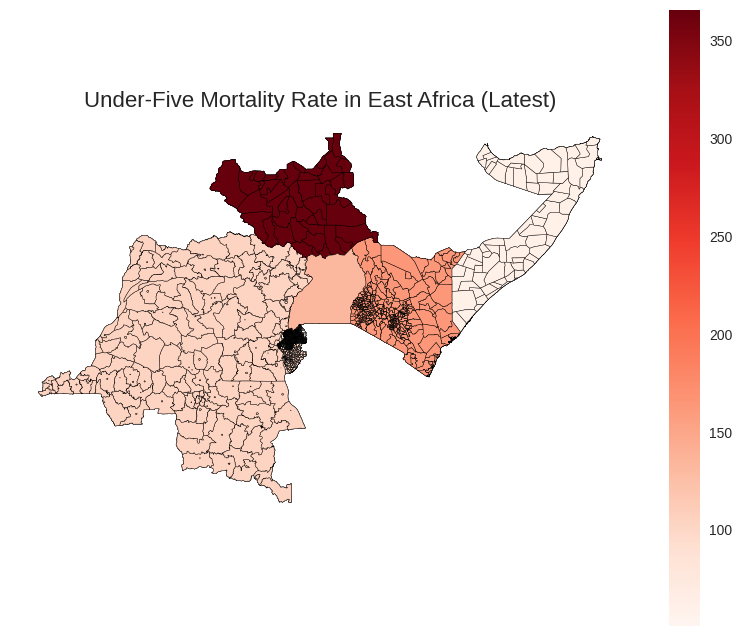

In [10]:

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Under-Five Mortality Rate', cmap='Reds', legend=True, edgecolor='black', ax=ax)
ax.set_title('Under-Five Mortality Rate in East Africa (Latest)', fontsize=16)
plt.axis('off')
plt.show()


# (b) Neonatal Mortality Map

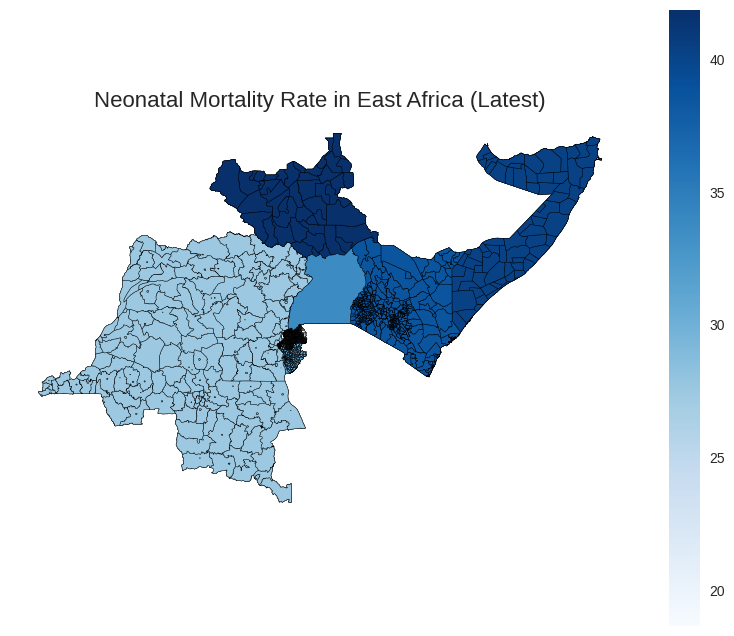

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Neonatal Mortality Rate', cmap='Blues', legend=True, edgecolor='black', ax=ax)
ax.set_title('Neonatal Mortality Rate in East Africa (Latest)', fontsize=16)
plt.axis('off')
plt.show()

**Explanation:**

We create choropleth maps coloring each country based on their mortality rate, using a color scale (Reds and Blues)

# **Step 8: Prepare Trends Data Over Time**
For both indicators

In [12]:
# Separate datasets
underfive_df = eac_data[eac_data['Indicator'] == 'Under-five mortality rate']
neonatal_df = eac_data[eac_data['Indicator'] == 'Neonatal mortality rate']

# Pivot
underfive_trends = underfive_df.pivot_table(index='Series Year', columns='Geographic area', values='Observation Value')
neonatal_trends = neonatal_df.pivot_table(index='Series Year', columns='Geographic area', values='Observation Value')

# Check
underfive_trends.head()


Geographic area,Burundi,Democratic Republic of the Congo,Kenya,Rwanda,Somalia,South Sudan,Uganda
Series Year,,,,,,,
1965.0,240.156500,NaN,NaN,NaN,NaN,NaN,NaN
1969.0,NaN,NaN,204.166667,NaN,NaN,NaN,223.666667
1970.0,244.578889,NaN,NaN,197.333333,NaN,NaN,NaN
1973.0,NaN,NaN,NaN,NaN,NaN,284.433333,NaN
1977.0,NaN,NaN,158.166667,NaN,NaN,NaN,NaN


# **Step 9: Plot Mortality Trends**
Now,we plot average trends with country-level points for each indicator

# (a) Under-Five Mortality Trend

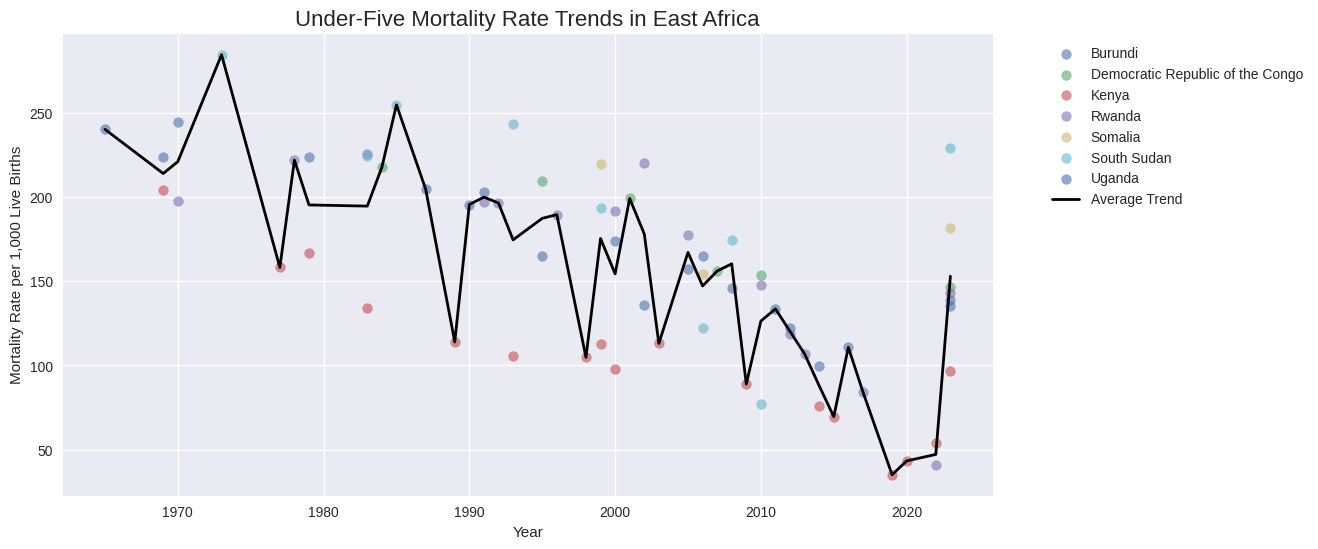

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter country points
for country in underfive_trends.columns:
    ax.scatter(underfive_trends.index, underfive_trends[country], label=country, alpha=0.6)

# Plot average trend
avg_underfive = underfive_trends.mean(axis=1)
ax.plot(avg_underfive.index, avg_underfive.values, color='black', linewidth=2, label='Average Trend')

ax.set_title('Under-Five Mortality Rate Trends in East Africa', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Mortality Rate per 1,000 Live Births')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# (b) Neonatal Mortality Trend

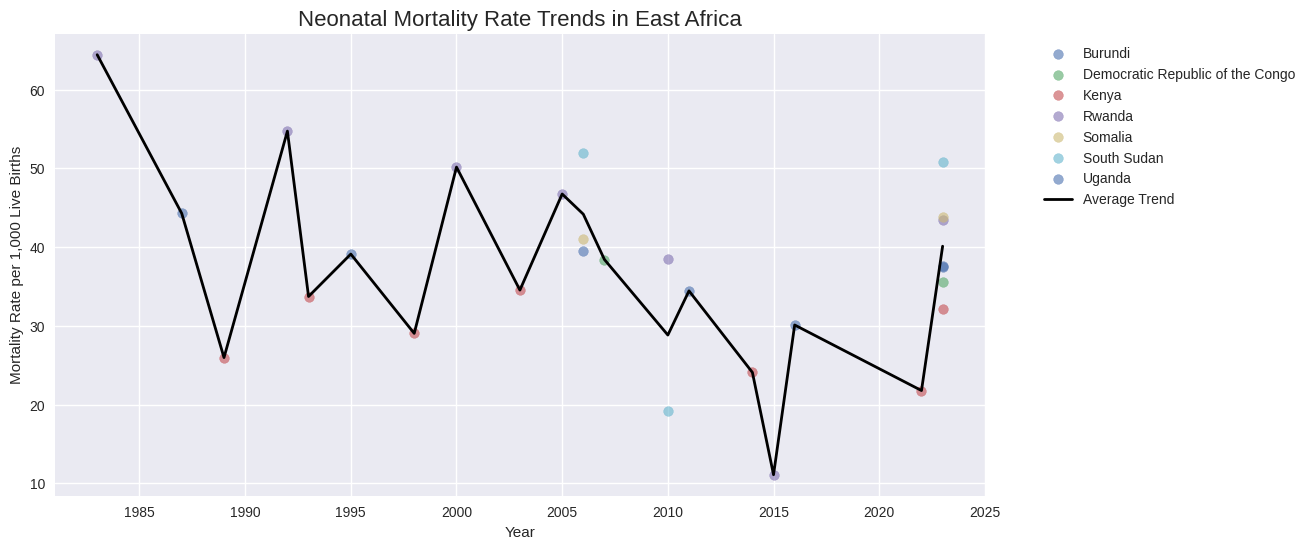

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter country points
for country in neonatal_trends.columns:
    ax.scatter(neonatal_trends.index, neonatal_trends[country], label=country, alpha=0.6)

# Plot average trend
avg_neonatal = neonatal_trends.mean(axis=1)
ax.plot(avg_neonatal.index, avg_neonatal.values, color='black', linewidth=2, label='Average Trend')

ax.set_title('Neonatal Mortality Rate Trends in East Africa', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Mortality Rate per 1,000 Live Births')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Explanation:**

- Scatter points represent country-level yearly estimates.

- The black line shows the average trend across all EAC countries.



# **Step 10: Identify Countries with Highest Mortality**


In [15]:
# Find highest Under-Five
highest_underfive = latest_data.sort_values(by='Under-Five Mortality Rate', ascending=False).head(1)

# Find highest Neonatal
highest_neonatal = latest_data.sort_values(by='Neonatal Mortality Rate', ascending=False).head(1)

print("Country with highest Under-Five Mortality Rate:")
print(highest_underfive)

print("\nCountry with highest Neonatal Mortality Rate:")
print(highest_neonatal)


Country with highest Under-Five Mortality Rate:
       Country  Neonatal Mortality Rate  Under-Five Mortality Rate
5  South Sudan                41.858952                      365.6

Country with highest Neonatal Mortality Rate:
       Country  Neonatal Mortality Rate  Under-Five Mortality Rate
5  South Sudan                41.858952                      365.6
